# Loading data

In [379]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [380]:
df=pd.read_csv("data1.txt",header=None)
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [404]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In column '2':

    '0' rdepresents Not Admitted
    '1' rdepresents Admitted

In [405]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


# Plotting data

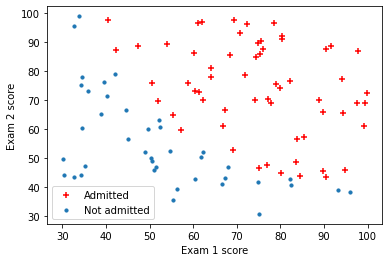

In [381]:
pos = (Y==1)
neg = (Y==0)

plt.scatter(X[pos[:],0],X[pos[:],1],c="r",marker="+")
plt.scatter(X[neg,0],X[neg,1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

# Logistic Regression model

In [382]:
x=df.iloc[:,:-1]
x.insert(0,'Ones',1)

y=df.iloc[:,-1]

theta = np.array([0.5]*len(x.columns))

In [383]:
# HYPOTHESIS
def hypothesis(theta,x):
    z = np.sum((x*theta),axis=1)
    return 1/(1+np.exp(-(z)))

# COST FUNCTION
def cost(x, y, theta):
    m = len(x)
    y1 = hypothesis(theta,x)
    return -(1/m)*np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

# GRADIENT DESCENT
def gradientDescent(x, y, theta, alpha, iters):
    J =[]
    m = len(x)
    for i in range(0, iters):
        h = hypothesis(theta,x)
        for j in range(0, len(x.columns)):
            theta[j] -= (alpha/m)*np.sum((h-y)*x.iloc[:,j])
#             print(theta)
        error = cost(x, y, theta)
        J.append(error)
    return J, theta

In [388]:
def predict(x, y, theta, alpha, iters):
    J, th = gradientDescent(x, y, theta, alpha, iters) 
    H = hypothesis(th, x)
    for i in range(0,len(H)):
        if H[i]>=0.5:
            H[i]=1
        else:
            H[i]=0
    y = list(y)
    accuracy = np.sum(y[k] == H[k] for k in range(0,len(y)))/len(y)
    return J, accuracy, H

C:\Users\richa\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\richa\AppData\Local\Temp\ipykernel_8476\1052024336.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  accuracy = np.sum(y[k] == H[k] for k in range(0,len(y)))/len(y)


In [ ]:
alpha = 0.00137
iters = 80000

J, ACCURACY, H = predict(x, y, theta, alpha, iters)

# Calculating Accuracy 

In [408]:
print('Cost (as predicted by the Cost Function)=', J[-1])
print('Accuracy =', ACCURACY*100, '%')

Cost (as predicted by the Cost Function)= 0.3717680714163929
Accuracy = 92.0 %


# Plotting the decision boundary
hypothesis(x)>= 0.5 is interpreted as predicting class '1'.

The descision boundary is:

    theta[0] + theta[1]x2 + theta[2]x3 = 0

Since, we plot x2 against x3, the boundary line will be the equation

    x3 = -(theta[0] + theta[1]x2) / theta[2]

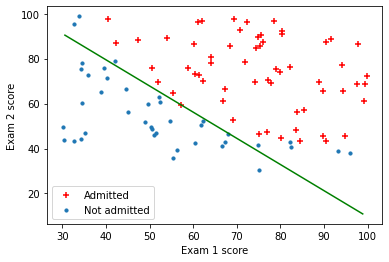

In [393]:
x2 = np.array([np.min(X[:,1]),np.max(X[:,1])])
x3 = -(theta[0] +theta[1]*x2)/theta[2]

plt.scatter( X[pos[:],0], X[pos[:],1], c="r", marker="+")
plt.scatter(X[neg,0], X[neg,1], marker="o", s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)
plt.plot(x2, x3, 'g')

# Predictions

In [390]:
# Model's Prediction
H

0     0.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Length: 100, dtype: float64